# Capstone project: Machine learning for Optimal Placement of New Coffee Shops in Toronto City

In [1]:
from bs4 import BeautifulSoup
import requests
import csv
import json
import xml
import pandas as pd
import numpy as np 
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print('Importing the libraries is complete.')

Importing the libraries is complete.


## Extract Toronto neighborhoods data from Wikipedia page 

In [2]:
url = "https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods"

results = requests.get(url).text 
parsed_results = BeautifulSoup(results, 'html.parser') 

info_table = parsed_results.find('table', class_ = 'wikitable')
raw_rows = info_table.find_all('tr')

neighborhood_info = []
for row in raw_rows:
    info = row.text.split('\n')[1:-1] 
    neighborhood_info.append(info)
    

main_df = pd.DataFrame(neighborhood_info[2:], columns=neighborhood_info[0])

#del main_df['FM']

index = main_df.index
columns = main_df.columns
values = main_df.values

# Create the dataframe including Name, Population, Population density and Average income of the neighborhoods, add Lattitude and Longitude columns to the dataframe 

In [11]:
df1=main_df['Name']
df2=main_df['Population']
df3=main_df['Density (people/km2)']
df4=main_df['Average Income']
Toronto_data = pd.concat([df1,df2,df3,df4], axis=1)
print('Dataframe shape: ', Toronto_data.shape)
Toronto_data.head()
Toronto_data["Latitude"]= ""
Toronto_data["Longitude"]= ""
Toronto_data.head()

Dataframe shape:  (174, 4)


,Name,Population,Density (people/km2),Average Income,Latitude,Longitude
0,Agincourt,"44,577",3580,"25,750",,
1,Alderwood,"11,656",2360,"35,239",,
2,Alexandra Park,"4,355","13,609","19,687",,
3,Allenby,"2,513",4333,"245,592",,
4,Amesbury,"17,318","4,934","27,546",,


# Use geocoders to find the geospatial location of each neighborhood

In [12]:
for index, row in Toronto_data.iterrows():
        j=row['Name']+', Toronto, Ontario'
        geolocator = Nominatim()
        location = geolocator.geocode(j)
        if str(type(location))!="<class 'NoneType'>":
            latit = location.latitude
            longit = location.longitude
            row['Latitude']=float(latit)
            row['Longitude']=float(longit) 


Toronto_data

,Name,Population,Density (people/km2),Average Income,Latitude,Longitude
0,Agincourt,"44,577",3580,"25,750",43.7854,-79.2785
1,Alderwood,"11,656",2360,"35,239",43.6017,-79.5452
2,Alexandra Park,"4,355","13,609","19,687",43.6508,-79.4043
3,Allenby,"2,513",4333,"245,592",43.7114,-79.5534
4,Amesbury,"17,318","4,934","27,546",43.7062,-79.4835
5,Armour Heights,"4,384",1914,"116,651",43.7439,-79.4309
6,Banbury,"6,641",2442,"92,319",43.7428,-79.37
7,Bathurst Manor,"14,945",3187,"34,169",43.7639,-79.4564
8,Bay Street Corridor,"4,787","43,518","40,598",43.6653,-79.3875
9,Bayview Village,"12,280","2,966","46,752",43.7692,-79.3767


# Remove missing data

In [18]:
Toronto_data.drop(Toronto_data.index[60],inplace=True)
Toronto_data.drop(Toronto_data.index[63],inplace=True)
Toronto_data["Population"] = Toronto_data["Population"].str.replace(",","").astype(float)
Toronto_data["Density (people/km2)"] = Toronto_data["Density (people/km2)"].str.replace(",","").astype(float)
Toronto_data["Average Income"] = Toronto_data["Average Income"].str.replace(",","").astype(float)
Toronto_data

,Name,Population,Density (people/km2),Average Income,Latitude,Longitude
0,Agincourt,44577.0,3580.0,25750.0,43.7854,-79.2785
1,Alderwood,11656.0,2360.0,35239.0,43.6017,-79.5452
2,Alexandra Park,4355.0,13609.0,19687.0,43.6508,-79.4043
3,Allenby,2513.0,4333.0,245592.0,43.7114,-79.5534
4,Amesbury,17318.0,4934.0,27546.0,43.7062,-79.4835
5,Armour Heights,4384.0,1914.0,116651.0,43.7439,-79.4309
6,Banbury,6641.0,2442.0,92319.0,43.7428,-79.37
7,Bathurst Manor,14945.0,3187.0,34169.0,43.7639,-79.4564
8,Bay Street Corridor,4787.0,43518.0,40598.0,43.6653,-79.3875
9,Bayview Village,12280.0,2966.0,46752.0,43.7692,-79.3767


In [39]:
Toronto_data["Latitude"] = Toronto_data["Latitude"].apply(pd.to_numeric, errors='coerce')
Toronto_data["Longitude"] = Toronto_data["Longitude"].apply(pd.to_numeric, errors='coerce')
Toronto_data.dropna(subset=["Longitude"],inplace=True)
Toronto_data.reset_index(drop=True,inplace=True)
Toronto_data.dtypes

Name                     object
Population              float64
Density (people/km2)    float64
Average Income          float64
Latitude                float64
Longitude               float64
dtype: object

In [41]:
print('Dataframe shape: ', Toronto_data.shape)

Dataframe shape:  (158, 6)


# Generate the map of the neighborhoods

In [42]:
import folium # map rendering library

address = 'Toronto, ON'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

#map = folium.Map(location=[latitude,longitude], zoom_start=10) # generate map centred Toronto 

# create map of New York using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, name in zip(Toronto_data['Latitude'], Toronto_data['Longitude'], Toronto_data['Name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

The geograpical coordinate of Toronto are 43.653963, -79.387207.


# use Foursquare API to find top venues in each neighborhood

In [43]:
CLIENT_ID = 'XECTY5PPHRABUOP5ES5E5WFTI0GRXUNRR3YNBTXHYUKMVAAD' # your Foursquare ID
CLIENT_SECRET = 'KVZ1NNEXNU5LQXJGFTDNRIUZKQXEPD0XYWSLFL2OZLKNMBU3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XECTY5PPHRABUOP5ES5E5WFTI0GRXUNRR3YNBTXHYUKMVAAD
CLIENT_SECRET:KVZ1NNEXNU5LQXJGFTDNRIUZKQXEPD0XYWSLFL2OZLKNMBU3


In [44]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [45]:
LIMIT = 50 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

Toronto_venues = getNearbyVenues(names=Toronto_data['Name'],
                                   latitudes=Toronto_data['Latitude'],
                                   longitudes=Toronto_data['Longitude']
                                  )

Agincourt
Alderwood
Alexandra Park
Allenby
Amesbury
Armour Heights
Banbury
Bathurst Manor
Bay Street Corridor
Bayview Village
Bayview Woods – Steeles
Bedford Park
Bendale
Birch Cliff
Bloor West Village
Bracondale Hill
Branson
Bridle Path
Brockton
Cabbagetown
Caribou Park
Carleton Village
Casa Loma
Centennial
Chaplin Estates
Christie Pits
Church and Wellesley
Clairlea
Cliffcrest
Cliffside
Corktown
Crescent Town
Cricket Club
Davenport
Davisville
Deer Park
Discovery District
Don Mills
Don Valley Village
Dorset Park
Dovercourt Park
Downsview
Dufferin Grove
Earlscourt
East Danforth
Eatonville
Eglinton East
Elia (Jane and Finch)
Eringate
Fairbank
Fashion District
Financial District
Flemingdon Park
Forest Hill
Fort York/Liberty Village
Garden District
Glen Park
Graydon Hall
Guildwood
Henry Farm
Highland Creek
Hillcrest
Hoggs Hollow
Humber Heights
Humber Summit
Humber Valley Village
Humberlea
Humberwood
Ionview
Islington – Six Points
Junction Triangle
Kensington Market
Kingsview Village
Lambto

In [46]:
Toronto_venues_copy = Toronto_venues.copy()
print(Toronto_venues.shape)
Toronto_venues.head()

(2987, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt,43.785353,-79.278549,Maple Yip Seafood 陸羽海鮮酒家,43.784752,-79.277787,Chinese Restaurant
1,Agincourt,43.785353,-79.278549,One2 Snacks,43.787048,-79.276658,Asian Restaurant
2,Agincourt,43.785353,-79.278549,In Cheon House Korean & Japanese Restaurant 인천관,43.786468,-79.275693,Korean Restaurant
3,Agincourt,43.785353,-79.278549,Tim Hortons,43.785637,-79.279215,Coffee Shop
4,Agincourt,43.785353,-79.278549,Beef Noodle Restaurant 老李牛肉麵,43.785937,-79.276031,Chinese Restaurant


In [47]:
Toronto_venues=Toronto_venues_copy
Toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,15,15,15,15,15,15
Alderwood,10,10,10,10,10,10
Alexandra Park,50,50,50,50,50,50
Allenby,10,10,10,10,10,10
Amesbury,4,4,4,4,4,4
Armour Heights,3,3,3,3,3,3
Banbury,4,4,4,4,4,4
Bathurst Manor,4,4,4,4,4,4
Bay Street Corridor,50,50,50,50,50,50


In [48]:
print('There are {} uniques categories.'.format(len(Toronto_venues['Venue Category'].unique())))
Toronto_venues.head()

There are 296 uniques categories.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt,43.785353,-79.278549,Maple Yip Seafood 陸羽海鮮酒家,43.784752,-79.277787,Chinese Restaurant
1,Agincourt,43.785353,-79.278549,One2 Snacks,43.787048,-79.276658,Asian Restaurant
2,Agincourt,43.785353,-79.278549,In Cheon House Korean & Japanese Restaurant 인천관,43.786468,-79.275693,Korean Restaurant
3,Agincourt,43.785353,-79.278549,Tim Hortons,43.785637,-79.279215,Coffee Shop
4,Agincourt,43.785353,-79.278549,Beef Noodle Restaurant 老李牛肉麵,43.785937,-79.276031,Chinese Restaurant


In [49]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")
Toronto_onehot.drop(['Neighborhood'], axis=1,inplace=True)
Toronto_onehot = pd.concat([Toronto_venues['Neighborhood'], Toronto_onehot], axis=1, sort=False)

Toronto_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Trail,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Rec Center,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Rink,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Housing Development,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Lawyer,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Supply Store,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Peking Duck Restaurant,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Piano Bar,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Rock Climbing Spot,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Stat

In [50]:
Toronto_grouped = Toronto_onehot.groupby('Neighborhood').mean().reset_index()
Toronto_grouped.head()


,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Trail,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Rec Center,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Rink,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hotel,Hotel Bar,Housing Development,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Lawyer,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts Dojo,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Supply Store,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Peking Duck Restaurant,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Piano Bar,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Rock Climbing Spot,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Trail,Train Stat

In [51]:
Toronto_grouped.shape

(157, 296)

In [52]:
coffee_venues=Toronto_grouped['Coffee Shop']+Toronto_grouped['Café'].astype(float)

# Combine neighborhoods data and venues for coffee shops

In [63]:
Toronto_final = pd.concat([Toronto_data, coffee_venues], axis=1, sort=False)
Toronto_final.rename(columns={0:'venues'}, inplace=True)
Toronto_final.drop(Toronto_final.index[154],inplace=True)
Toronto_final.dropna(subset=["venues"],inplace=True)
Toronto_final.head()

,Name,Population,Density (people/km2),Average Income,Latitude,Longitude,venues
0,Agincourt,44577.0,3580.0,25750.0,43.785353,-79.278549,0.066667
1,Alderwood,11656.0,2360.0,35239.0,43.601717,-79.545232,0.100000
2,Alexandra Park,4355.0,13609.0,19687.0,43.650758,-79.404298,0.060000
3,Allenby,2513.0,4333.0,245592.0,43.711351,-79.553424,0.100000
4,Amesbury,17318.0,4934.0,27546.0,43.706162,-79.483492,0.250000


# Create final dataframe and perform k-mean clustering

In [64]:
Toronto_grouped_clustering = Toronto_final.drop(['Name','Latitude','Longitude'], axis='columns')
Toronto_grouped_clustering['Population']=1/Toronto_grouped_clustering['Population']
Toronto_grouped_clustering['Density (people/km2)']=1/Toronto_grouped_clustering['Density (people/km2)']
Toronto_grouped_clustering['Average Income']=1/Toronto_grouped_clustering['Average Income']

Toronto_grouped_clustering.head()

,Population,Density (people/km2),Average Income,venues
0,0.000022,0.000279,0.000039,0.066667
1,0.000086,0.000424,0.000028,0.100000
2,0.000230,0.000073,0.000051,0.060000
3,0.000398,0.000231,0.000004,0.100000
4,0.000058,0.000203,0.000036,0.250000


In [65]:
from sklearn import preprocessing

In [66]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 2, 3, 3, 3, 0, 0], dtype=int32)

In [67]:
#Toronto_final.drop(["Cluster Labels"], axis = 1, inplace = True) 
Toronto_final.insert(7, 'Cluster Labels', kmeans.labels_)
Toronto_final.head()

,Name,Population,Density (people/km2),Average Income,Latitude,Longitude,venues,Cluster Labels
0,Agincourt,44577.0,3580.0,25750.0,43.785353,-79.278549,0.066667,0
1,Alderwood,11656.0,2360.0,35239.0,43.601717,-79.545232,0.100000,0
2,Alexandra Park,4355.0,13609.0,19687.0,43.650758,-79.404298,0.060000,0
3,Allenby,2513.0,4333.0,245592.0,43.711351,-79.553424,0.100000,0
4,Amesbury,17318.0,4934.0,27546.0,43.706162,-79.483492,0.250000,2


# Use folium map to plot different clusters

In [68]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_final['Latitude'], Toronto_final['Longitude'], Toronto_final['Name'], Toronto_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [69]:
Toronto_final.sort_values(by=['Cluster Labels'],inplace=True)
#Toronto_final.reset_index(inplace=True)
Toronto_final.head(15)

,Name,Population,Density (people/km2),Average Income,Latitude,Longitude,venues,Cluster Labels
0,Agincourt,44577.0,3580.0,25750.0,43.785353,-79.278549,0.066667,0
50,Fashion District,4642.0,4737.0,63282.0,43.645456,-79.394994,0.100000,0
121,Seaton Village,5259.0,8482.0,41506.0,43.669276,-79.415960,0.100000,0
26,Church and Wellesley,13397.0,24358.0,37653.0,43.665524,-79.383801,0.060000,0
118,Scarborough Junction,25780.0,3479.0,25405.0,43.716049,-79.260703,0.068182,0
69,Islington – Six Points,16508.0,4106.0,43570.0,43.634539,-79.519267,0.100000,0
113,Roncesvalles,15996.0,8079.0,46820.0,43.651443,-79.451038,0.095238,0
112,Riverdale,31007.0,7771.0,40139.0,43.665470,-79.352594,0.060606,0
110,Princess Gardens,9288.0,2249.0,80607.0,43.647059,-79.389248,0.100000,0
49,Fairbank,34121.0,7720.0,28403.0,43.695689,-79.450310,0.090909,0


In [70]:
#Toronto_final.drop(["Variable"], axis = 1, inplace = True) 
Toronto_final.insert(8, 'Variable', Toronto_final['venues']/Toronto_final['Population']/Toronto_final['Average Income']*100000000000)
#Toronto_final['venues']/Toronto_final['Population']/Toronto_final['Average Income']

In [71]:
Toronto_final.head()

,Name,Population,Density (people/km2),Average Income,Latitude,Longitude,venues,Cluster Labels,Variable
0,Agincourt,44577.0,3580.0,25750.0,43.785353,-79.278549,0.066667,0,5.807921
50,Fashion District,4642.0,4737.0,63282.0,43.645456,-79.394994,0.100000,0,34.041969
121,Seaton Village,5259.0,8482.0,41506.0,43.669276,-79.415960,0.100000,0,45.812706
26,Church and Wellesley,13397.0,24358.0,37653.0,43.665524,-79.383801,0.060000,0,11.894443
118,Scarborough Junction,25780.0,3479.0,25405.0,43.716049,-79.260703,0.068182,0,10.410377


# Plot different variables vs cluster labels

In [72]:
import matplotlib.pyplot as plt
ax = Toronto_final.plot(kind='scatter', x='Cluster Labels', y='Population')
ax.set_xlabel("Cluster Labels")
ax.set_ylabel("Population")
plt.savefig('Population.jpg')

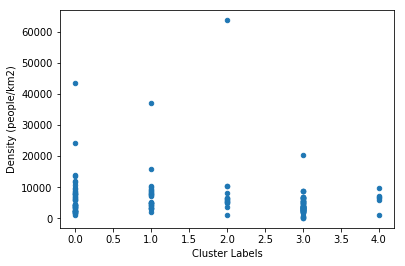

In [73]:
ax = Toronto_final.plot(kind='scatter', x='Cluster Labels', y='Density (people/km2)')
ax.set_xlabel("Cluster Labels")
ax.set_ylabel("Density (people/km2)")
plt.savefig('Density.jpg')

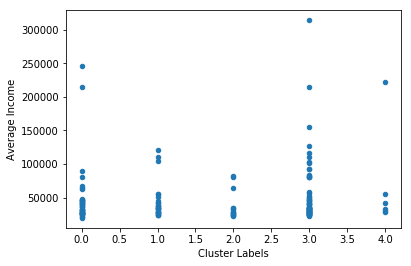

In [74]:
ax = Toronto_final.plot(kind='scatter', x='Cluster Labels', y='Average Income')
ax.set_xlabel("Cluster Labels")
ax.set_ylabel("Average Income")
plt.savefig('Average Income.jpg')

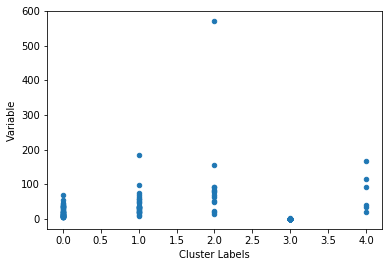

In [75]:
ax = Toronto_final.plot(kind='scatter', x='Cluster Labels', y='Variable')
ax.set_xlabel("Cluster Labels")
ax.set_ylabel("Variable")
plt.savefig('Variable.jpg')